In [90]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
%load_ext autoreload
%autoreload 2

from implementations import *
from helpers import *
from cross_validation import*
from utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:

# load data.
particle, products, ids = load_csv_data('data/train.csv', sub_sample= True)

products_ext = np.c_[np.ones((particle.shape[0], 1)), products]


#change -1,1 to 0,1



In [92]:
products_999_to_mean =  handle_nans(products)        




###  Visualize data

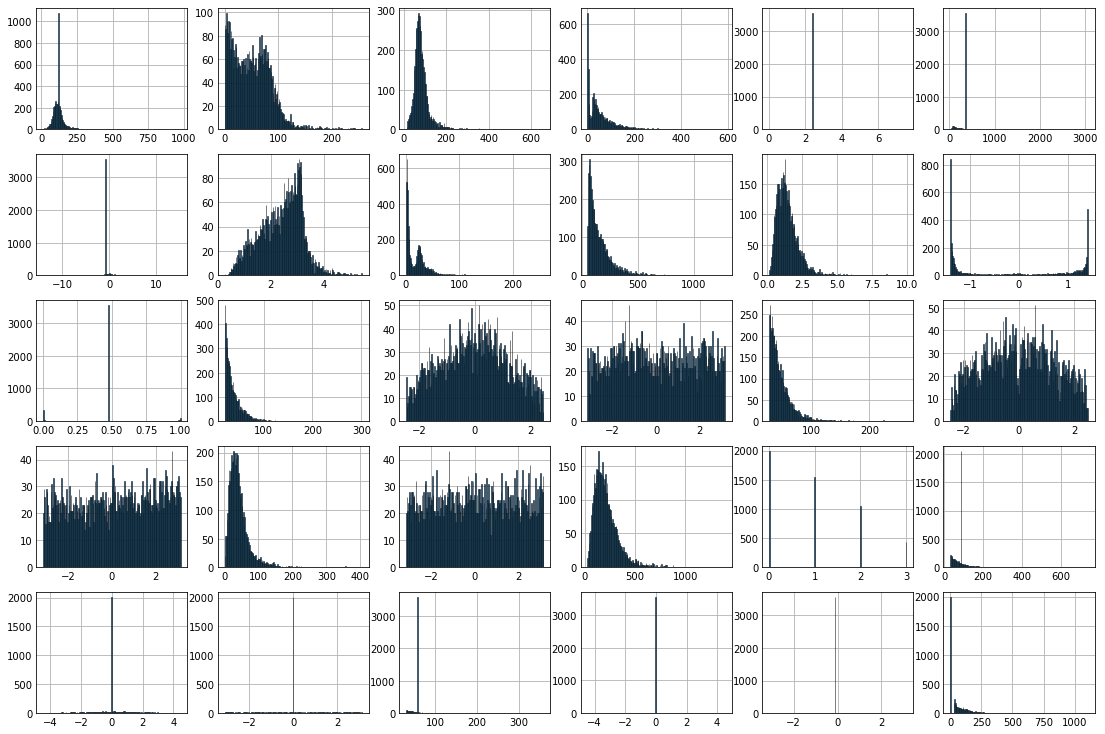

In [93]:

plt.style.use('_mpl-gallery')
# make data
np.random.seed(1)
# plot:
fig, ax = plt.subplots(5,6)

fig.set_size_inches(15, 10)
i=0
j=0
for feature in products_999_to_mean.T:
    ax[i,j].hist(feature, bins=200, linewidth=0.5, edgecolor="black")
    if j==5:
        j = 0
        i += 1
    else:
        j += 1

plt.show()



In [94]:
# build sampled x and y.
seed = 1
y = np.expand_dims(particle, axis=1)
#y, X = sample_data(y, products, seed, size_samples=1000)

#y, x = sample_data(y, products_logged_and_std, seed, size_samples=2000)

y, x = sample_data(y, products_999_to_mean, seed, size_samples=1000)

change_labels(y)
#y, x = sample_data(y, products, seed, size_samples=1000)

x, mean_x, std_x = standardize(x)

tx = np.c_[np.ones((y.shape[0], 1)), x]

### Removing features

In [95]:
number_features=products.shape[1]
corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(products[:,i], products[:,j])[1,0]
        corr_matrix[i][j]=corr


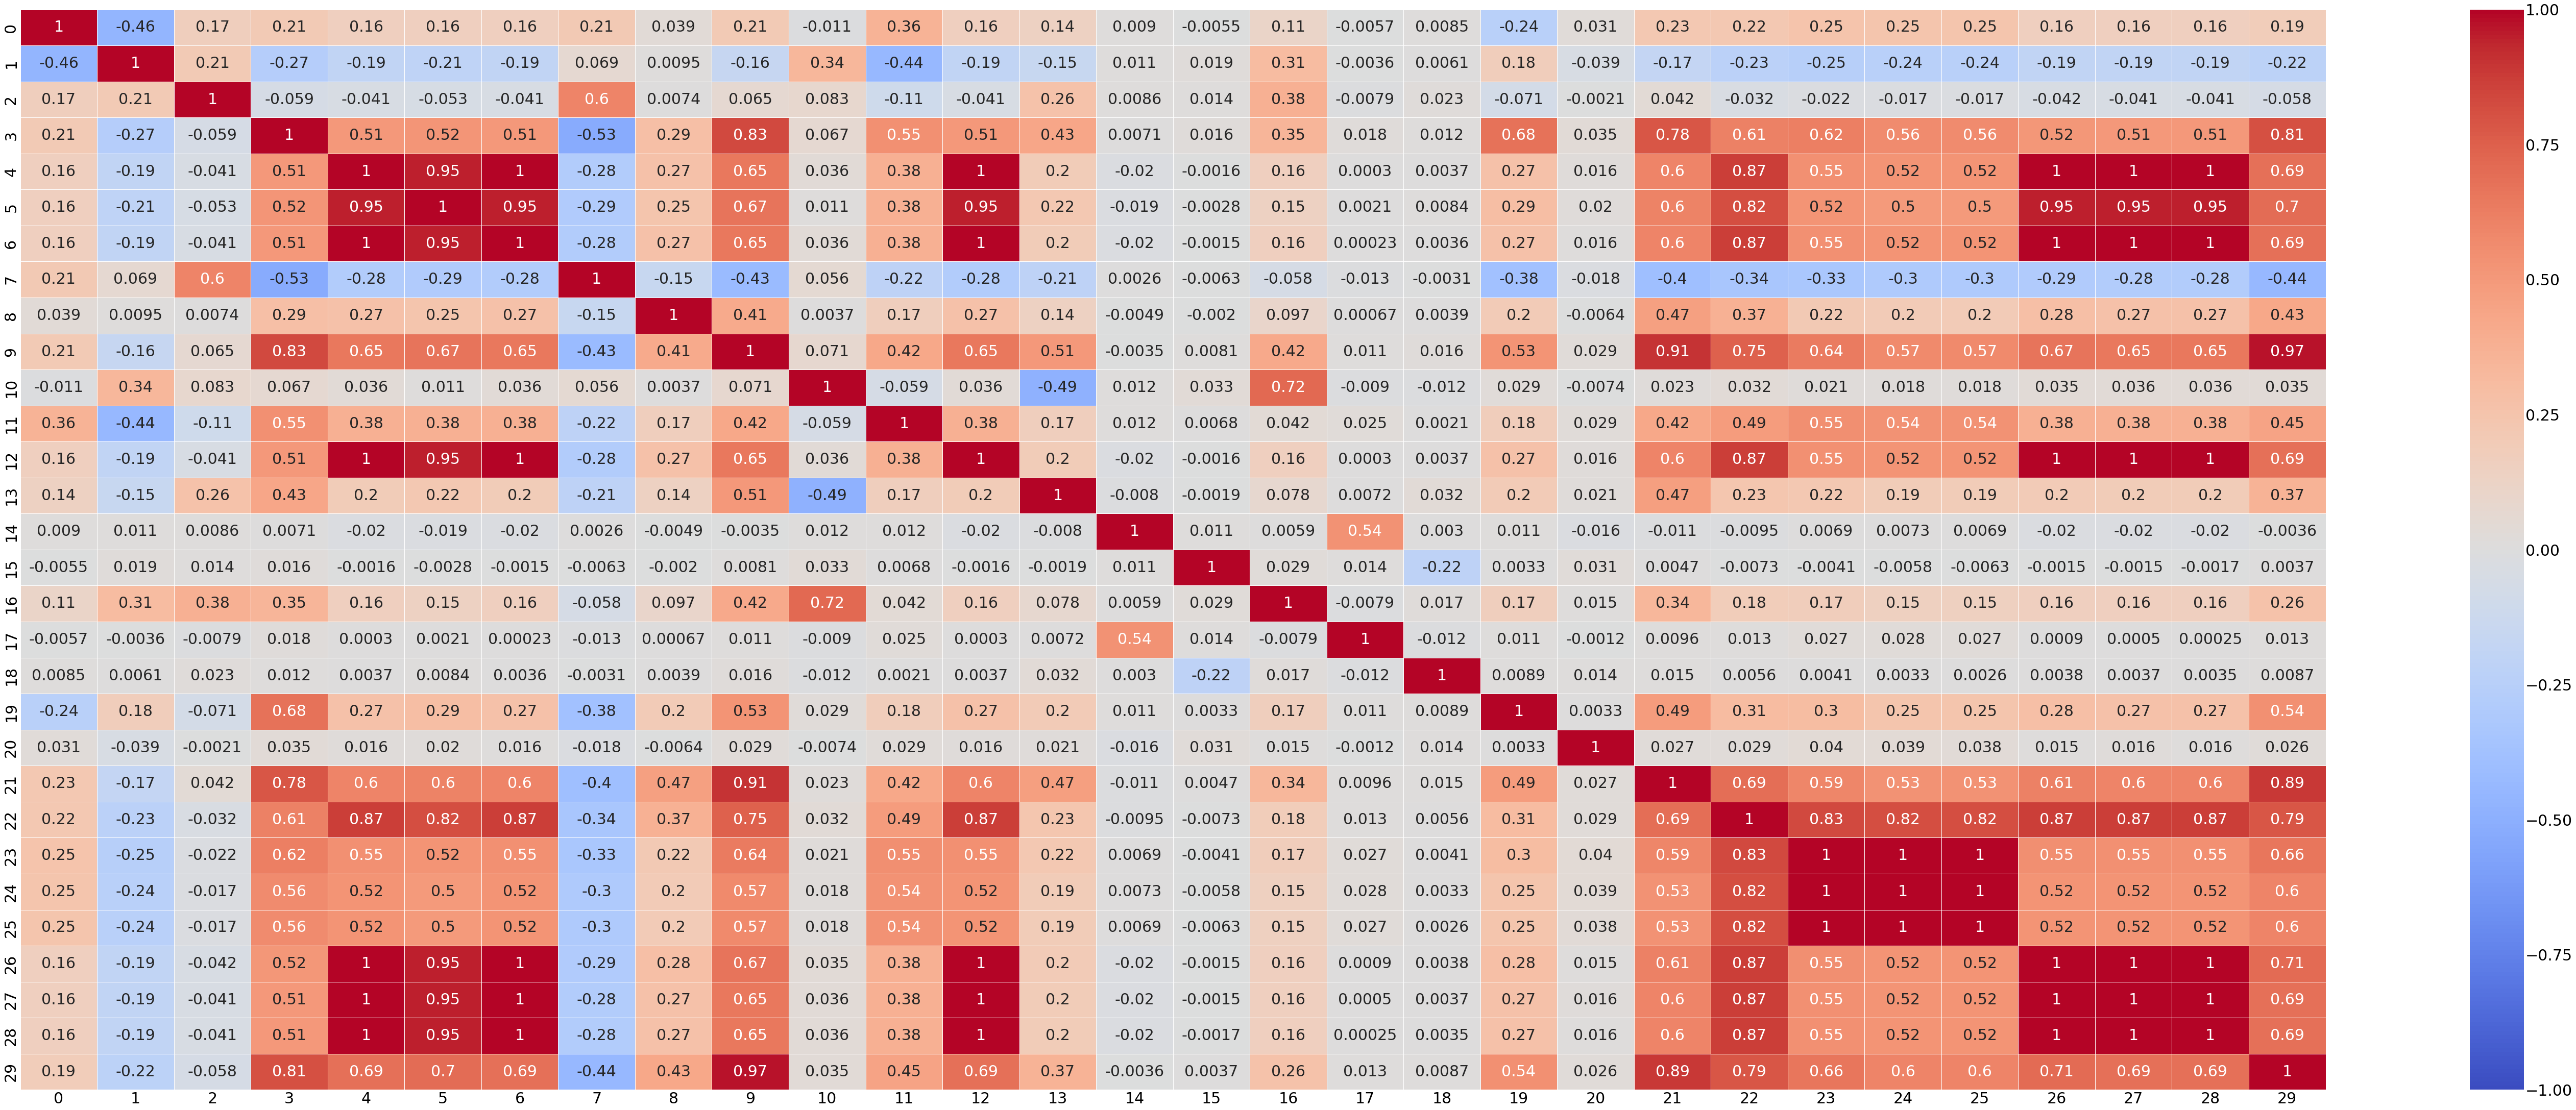

In [96]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [97]:

spearman_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        spear,_ = stats.spearmanr(products[:,i],products[:,j])
        spearman_matrix[i][j]=spear

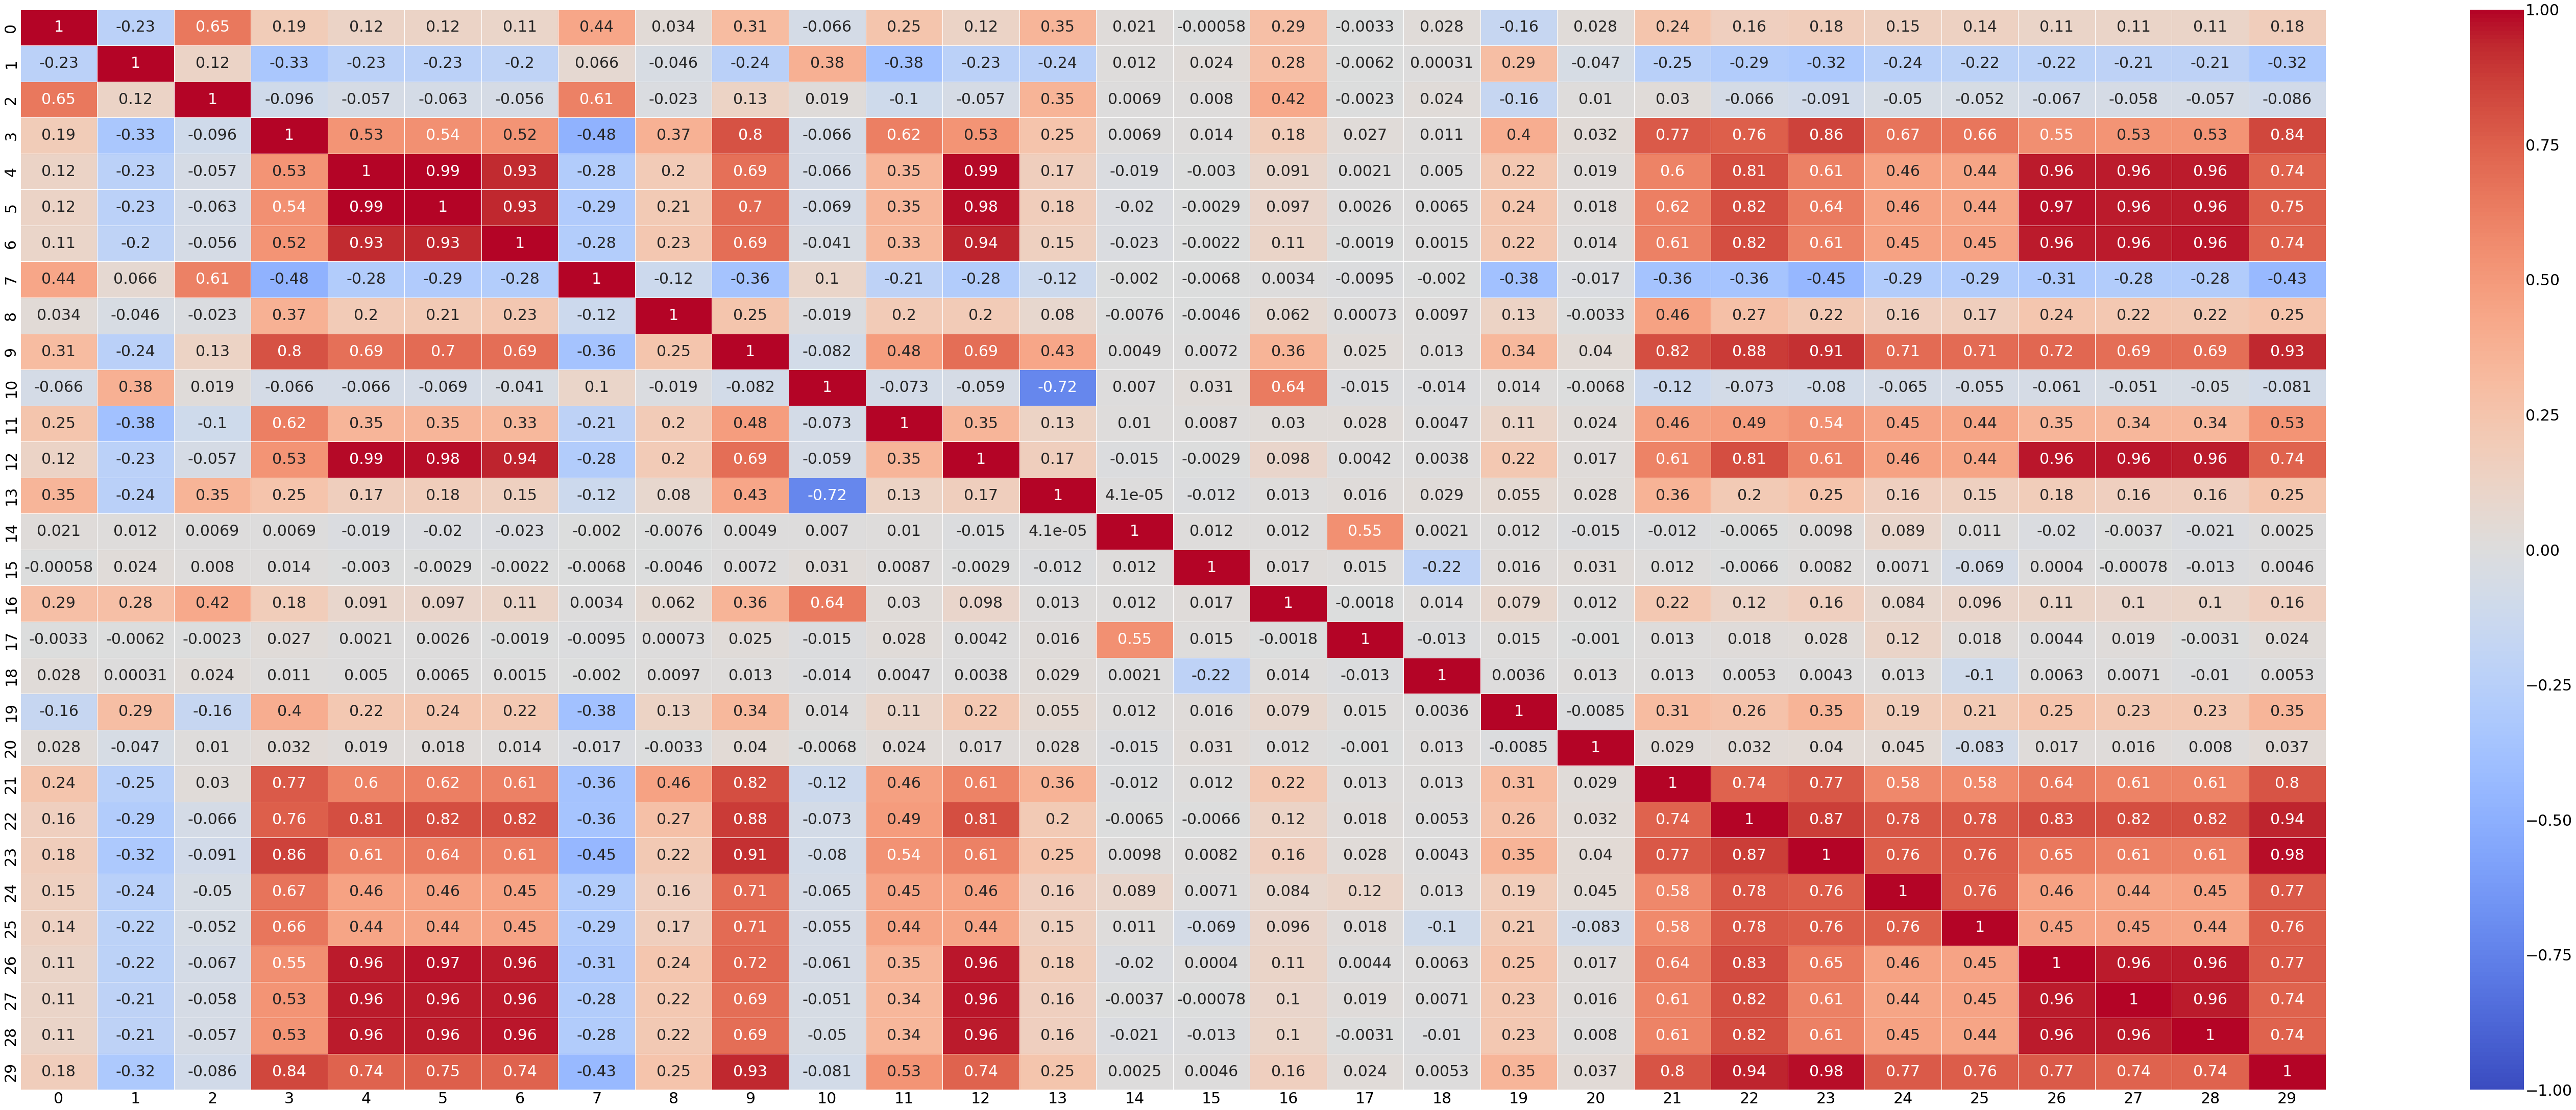

In [98]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(spearman_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [99]:
# create new matrix tx for training

axis = 1 #rows (0), columns (1)
obj = [4,5,6,9,21,24,25,26,27,28,29]
x_reduced = np.delete(x,obj,axis)
tx_reduced = np.c_[np.ones((y.shape[0], 1)), x_reduced]
#more drastic
#21 to 29

In [100]:
number_features=x_reduced.shape[1]
reduced_corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x_reduced[:,i], x_reduced[:,j])[1,0]
        reduced_corr_matrix[i][j]=corr

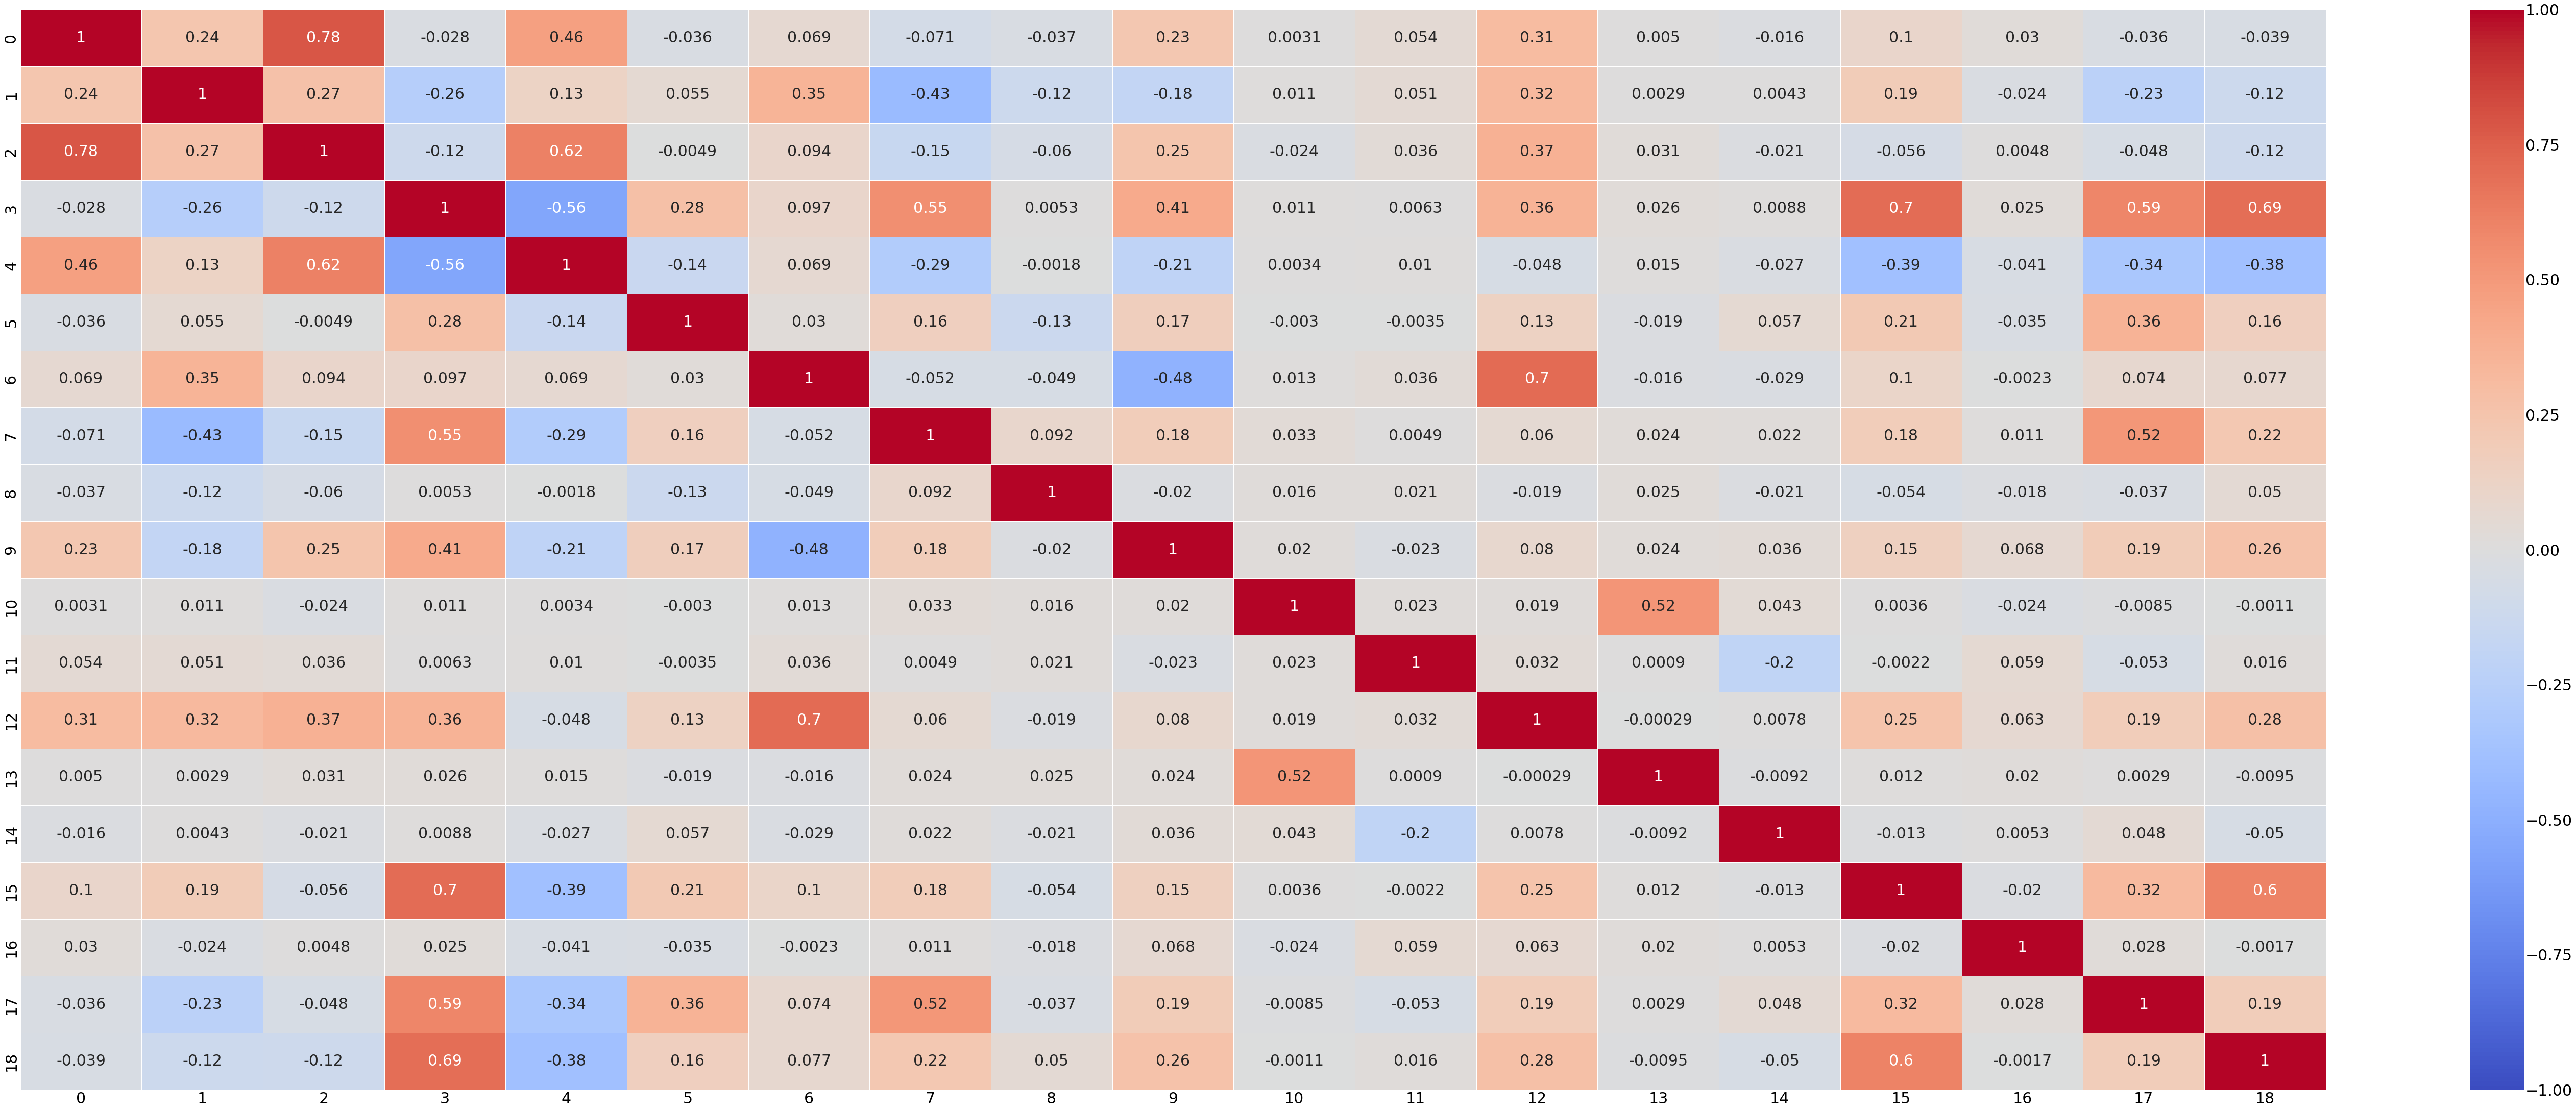

In [101]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(reduced_corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [102]:
# 17,18,8 --> 8

axis = 1 #rows (0), columns (1)
obj = [17,18]
x_reduced = np.delete(x_reduced,obj,axis)
tx_reduced = np.c_[np.ones((y.shape[0], 1)), x_reduced]

In [103]:
number_features=x_reduced.shape[1]
reduced_corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x_reduced[:,i], x_reduced[:,j])[1,0]
        reduced_corr_matrix[i][j]=corr

### Least SQUARES

In [104]:

#cross validation on a dataset split in two
k_indices = build_k_indices(y, 2, 1)
loss_train, loss_test = cross_validation_least_squares(y, tx, k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)
#train loss :  0.4005756804226127 test loss :  0.4088629589028149 with pipeline nlog and selected 

train loss :  0.399201208083708 test loss :  0.4229944680853193


In [105]:
#same thing but features are selected
k_indices = build_k_indices(y, 2, 1)
loss_train, loss_test = cross_validation_least_squares(y, tx_reduced, k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)

train loss :  0.4085442082856984 test loss :  0.4190693620279533


### Find best lambda for ridge regression

 the choice of lambda which leads to the best test rmse is 0.03290 with a test rmse of 0.418


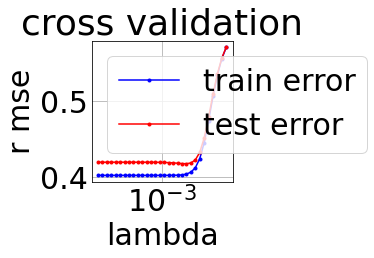

In [106]:
best_lambda, best_rmse = find_best_lambda_ridge_regression(tx, y, 7, np.logspace(-7, 1, 30))

### Logistic Regression

In [107]:
#cross validation on a dataset split in two

k_indices = build_k_indices(y, 2, 1)
initial_w = np.zeros((tx.shape[1], 1))

loss_train, loss_test = cross_validation_logistic_regression(y, tx, initial_w,  k_indices, 1)
print("train loss all features: ", loss_train, "test loss all features: ", loss_test)

Accuracy,  0.782  +/-  0.0
loss:  0.5155897676661144  +/-  1.1102230246251565e-16
train loss all features:  0.48064369362028536 test loss all features:  0.5155897676661145


In [108]:
#same thing but features are selected

k_indices = build_k_indices(y, 2, 1)
initial_w = np.zeros((tx_reduced.shape[1], 1))

loss_train, loss_test = cross_validation_logistic_regression(y, tx_reduced, initial_w,  k_indices, 1)
print("train loss all features: ", loss_train, "test loss all features: ", loss_test)

Accuracy,  0.764  +/-  0.0
loss:  0.5080762141587102  +/-  0.0
train loss all features:  0.49791045914830023 test loss all features:  0.5080762141587102


###  logistic cross validation

In [109]:
from cross_validation import *

k_indices = build_k_indices(y, 2, 1)

k=1


initial_w = np.zeros((tx.shape[1], 1))
loss_train, loss_test = cross_validation_logistic_regression(y, tx,initial_w, k_indices, k)
#print("train loss : ", loss_train, "test loss : ", loss_test)


# With raw features (gamma  0.0001, iter 10000), Accuracy : 0.73

# With raw features (gamma  0.0001, iter 1000), Accuracy :  0.732

# With raw features (gamma  0.000002395, iter 1000), Accuracy :  0.6319999999999999  

# With  features standardized (gamma  0.0001, iter 10000), Accuracy : 0.716

# With  features standardized and -999 set to the mean of other values (gamma  0.0001, iter 10000), Accuracy : 0.758

Accuracy,  0.782  +/-  0.0
loss:  0.5155897676661144  +/-  1.1102230246251565e-16


In [110]:
from cross_validation import *
initial_w = np.zeros((tx.shape[1], 1))



cross_validation_logistic_regression_full(y, tx,initial_w,8)

# with raw features  1000, 0.000002,  Accuracy,   0.711  +/-  0.05548873759602035

# with standardized features  1000, 0.000002,  Accuracy,   0.694  +/-  0.05257375771237966

#with standardized features and -999 replaced with means 1000, 0.000002,  Accuracy 0.714  +/-  0.05377731863899503

#with standardized features and -999 replaced with means 1000 and logging 2 features, 0.000002,  Accuracy 0.722  +/-  0.054808758424178906

Accuracy,  0.734  +/-  0.035270384177096825


(1.0215616816008366, 0.734)

###  logistic regularized cross validation

In [111]:

k_indices = build_k_indices(y, 2, 1)

k=1

initial_w = np.zeros((tx_reduced.shape[1], 1))
loss_train, loss_test = cross_validation_logistic_regression(y, tx_reduced,initial_w, k_indices, k)


# With  features standardized (gamma  0.0001, iter 10000), filtered and -999 set to the mean of other values, Accuracy : 0.74




Accuracy,  0.764  +/-  0.0
loss:  0.5080762141587102  +/-  0.0


### FIND BEST LAMBDA EXPended

C:\Users\Tanguy\ml-project-1-stochastickers\implementations.py:255: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))
C:\Users\Tanguy\ml-project-1-stochastickers\implementations.py:283: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Tanguy\ml-project-1-stochastickers\implementations.py:283: RuntimeWarning: invalid value encountered in multiply
  


Accuracy for lambda  1e-07 :  0.7730000000000001  +/-  0.01905255888325767
Accuracy for lambda  5.336699231206313e-07 :  0.7770000000000001  +/-  0.0172916164657906
Accuracy for lambda  2.848035868435805e-06 :  0.7770000000000001  +/-  0.0172916164657906
Accuracy for lambda  1.5199110829529332e-05 :  0.7770000000000001  +/-  0.0172916164657906
Accuracy for lambda  8.111308307896872e-05 :  0.7770000000000001  +/-  0.0172916164657906
Accuracy for lambda  0.00043287612810830614 :  0.778  +/-  0.021633307652783956
Accuracy for lambda  0.002310129700083158 :  0.7810000000000001  +/-  0.017058722109231997
Accuracy for lambda  0.012328467394420659 :  0.7709999999999999  +/-  0.014798648586948755
Accuracy for lambda  0.06579332246575682 :  0.752  +/-  0.008485281374238578
Accuracy for lambda  0.35111917342151344 :  0.7409999999999999  +/-  0.032419130154894685
Accuracy for lambda  1.8738174228603868 :  0.718  +/-  0.030528675044947485
Accuracy for lambda  10.0 :  0.7169999999999999  +/-  0.013

'\nfeatures standardized degree, nan handled 3\n\n\nAccuracy for lambda  1e-05 :  0.728  +/-  0.01200000000000001\nAccuracy for lambda  3.5938136638046256e-05 :  0.728  +/-  0.01200000000000001\nAccuracy for lambda  0.0001291549665014884 :  0.728  +/-  0.01200000000000001\nAccuracy for lambda  0.0004641588833612782 :  0.728  +/-  0.01200000000000001\nAccuracy for lambda  0.0016681005372000592 :  0.728  +/-  0.01200000000000001\nAccuracy for lambda  0.005994842503189409 :  0.728  +/-  0.01200000000000001\nAccuracy for lambda  0.021544346900318846 :  0.728  +/-  0.01200000000000001\nAccuracy for lambda  0.07742636826811278 :  0.728  +/-  0.01200000000000001\nAccuracy for lambda  0.2782559402207126 :  0.728  +/-  0.01200000000000001\nAccuracy for lambda  1.0 :  0.728  +/-  0.01200000000000001\n\n'

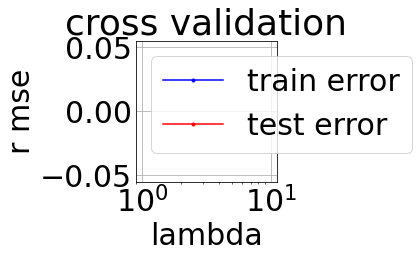

In [112]:
from cross_validation import *


find_best_lambda_reg_logistic_regression_exp(tx, y,3, 4, np.logspace(-7, 1, 12))

'''
#features raw degree 6
Accuracy for lambda  1e-05 :  0.706  +/-  0.016000000000000014
Accuracy for lambda  3.5938136638046256e-05 :  0.706  +/-  0.016000000000000014
Accuracy for lambda  0.0001291549665014884 :  0.706  +/-  0.016000000000000014
Accuracy for lambda  0.0004641588833612782 :  0.706  +/-  0.016000000000000014
Accuracy for lambda  0.0016681005372000592 :  0.706  +/-  0.016000000000000014
Accuracy for lambda  0.005994842503189409 :  0.706  +/-  0.016000000000000014
Accuracy for lambda  0.021544346900318846 :  0.6990000000000001  +/-  0.022999999999999965

features standardized degree 3
Accuracy for lambda  1e-05 :  0.719  +/-  0.01100000000000001
Accuracy for lambda  3.5938136638046256e-05 :  0.719  +/-  0.01100000000000001
Accuracy for lambda  0.0001291549665014884 :  0.719  +/-  0.01100000000000001
Accuracy for lambda  0.0004641588833612782 :  0.719  +/-  0.01100000000000001
Accuracy for lambda  0.0016681005372000592 :  0.719  +/-  0.01100000000000001
Accuracy for lambda  0.005994842503189409 :  0.719  +/-  0.01100000000000001
Accuracy for lambda  0.021544346900318846 :  0.719  +/-  0.01100000000000001
Accuracy for lambda  0.07742636826811278 :  0.719  +/-  0.01100000000000001
Accuracy for lambda  0.2782559402207126 :  0.719  +/-  0.01100000000000001
Accuracy for lambda  1.0 :  0.719  +/-  0.01100000000000001
'''


'''
features standardized degree, nan handled 3


Accuracy for lambda  1e-05 :  0.728  +/-  0.01200000000000001
Accuracy for lambda  3.5938136638046256e-05 :  0.728  +/-  0.01200000000000001
Accuracy for lambda  0.0001291549665014884 :  0.728  +/-  0.01200000000000001
Accuracy for lambda  0.0004641588833612782 :  0.728  +/-  0.01200000000000001
Accuracy for lambda  0.0016681005372000592 :  0.728  +/-  0.01200000000000001
Accuracy for lambda  0.005994842503189409 :  0.728  +/-  0.01200000000000001
Accuracy for lambda  0.021544346900318846 :  0.728  +/-  0.01200000000000001
Accuracy for lambda  0.07742636826811278 :  0.728  +/-  0.01200000000000001
Accuracy for lambda  0.2782559402207126 :  0.728  +/-  0.01200000000000001
Accuracy for lambda  1.0 :  0.728  +/-  0.01200000000000001

'''

### FIND BEST LAMBDA EXPended with features removed

In [ ]:

find_best_lambda_reg_logistic_regression_exp(tx_reduced, y,3, 8, np.logspace(-7, 1, 12))
# the choice of lambda which leads to the best test accuracy with gamma 0.02 and the entire pipeline is 0.000081113 with an accuracy of 0.786  +/-  0.02357965224510318

#best degree is 3

C:\Users\Tanguy\ml-project-1-stochastickers\implementations.py:283: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Tanguy\ml-project-1-stochastickers\implementations.py:283: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\Tanguy\ml-project-1-stochastickers\implementations.py:255: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


Accuracy for lambda  1e-07 :  0.783  +/-  0.02696293752542555
Accuracy for lambda  5.336699231206313e-07 :  0.784  +/-  0.024979991993593614
Accuracy for lambda  2.848035868435805e-06 :  0.786  +/-  0.021447610589527235
Accuracy for lambda  1.5199110829529332e-05 :  0.784  +/-  0.028000000000000008
Accuracy for lambda  8.111308307896872e-05 :  0.785  +/-  0.026057628441590774
